<a href="https://colab.research.google.com/github/amandacmelo/Projeto-Ciencia-de-Dados/blob/main/An%C3%A1lise%20Explorat%C3%B3ria%20dos%20Dados/An%C3%A1lise_explorat%C3%B3ria_dos_dados_Atividade_agr%C3%ADcola_e_Impacto_do_Covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
#Importação da bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/amandacmelo/Projeto-Ciencia-de-Dados/main/dados_limpos.csv"
dados = pd.read_csv(url, sep=",")

dados.columns

Index(['Ano', 'CDMunicipio', 'Populacao', 'PessoalOcupado',
       'PessoalAssalariado', 'VrSalarios', 'PIB', 'QtEmpresas',
       'AreaPlantada_h', 'AreaColhida_h', 'VlProducaoAgricola',
       'VlProducaoPecuaria', 'Area', 'Importacoes_US$', 'Exportacoes_US$',
       'Receitas_R$', 'Transferencias_correntes_R$',
       'Transferencias_capital_R$', 'NrNascimentos', 'NrObitosInfantis',
       'povoamento', 'UF', 'Municipio', 'Regiao', 'PIB_PerCapita',
       'Densidade_Populacional', 'Proporcao_PessoalAssalariado',
       'Proporcao_Area_Plantada'],
      dtype='object')

# 📊 **Análise do impacto da atividade agrícola na vida da população local**

Este tópico apresenta a análise do impacto da produção agrícola na vida da população local.


Como ja é sabido, a atividade agrícola e pecuária é um dos pilares fundamentais da economia brasileira, especialmente em áreas rurais onde grande parte da população depende diretamente da agricultura para sua subsistência e qualidade de vida. Analisar o impacto da atividade agrícola na vida da população local é essencial para compreender como o setor influencia o desenvolvimento econômico, a geração de empregos e a melhoria das condições sociais dessas comunidades. Esse entendimento é crucial para a criação de políticas públicas que promovam a sustentabilidade, a inclusão social e o fortalecimento da economia regional, além de nos proporcionar análises de se tal cultura vem sendo importante no desenvolvimento regional.

Para esta análise, primeiramente foram utilizadas as colunas de Produção Agrícola, Produção Pecuária, Pessoal Assalariado e Valor de Exportação para investigar a relação entre essas atividades e o desenvolvimento da região. Para cada gráfico, filtrou-se os dados referentes apenas à região Centro-Oeste e, em seguida, os valores foram agrupados por ano, somando-se o total registrado (Produção Agrícola, Produção Pecuária, Pessoal Assalariado ou Valor de Exportação) em cada período.

Posteriormente, foi calculada a taxa de crescimento ano a ano, comparando o valor de cada ano com o do ano anterior e expressando essa variação em porcentagem.

Com essas informações, elaborou-se um gráfico com dois eixos:

- O gráfico de barras (em azul) apresenta o valor total de cada indicador ao longo dos anos.

- O gráfico de pontos (em vermelho) ilustra a variação percentual ano a ano, indicando o crescimento ou a queda em relação ao período anterior.

Além disso, adicionamos etiquetas com os valores percentuais de crescimento para facilitar a visualização dos dados.

Optou-se por focar na região Centro-Oeste do Brasil devido à sua forte representatividade na produção de insumos agrícolas e Pecuário, setores que se configuram como pilares da economia da maioria dos seus estados e municípios (1).

Dessa forma, conclui-se que o valor de exportação da região é fortemente influenciado pela produção agrícola, o que reforça a relevância desses dados para a análise proposta neste tópico.

**Referências:**

1- UNIDERP. Região Centro-Oeste: oportunidades e vida na região. Disponível em: https://blog.uniderp.com.br/regiao-centro-oeste/. Acesso em: 24 abr. 2025.


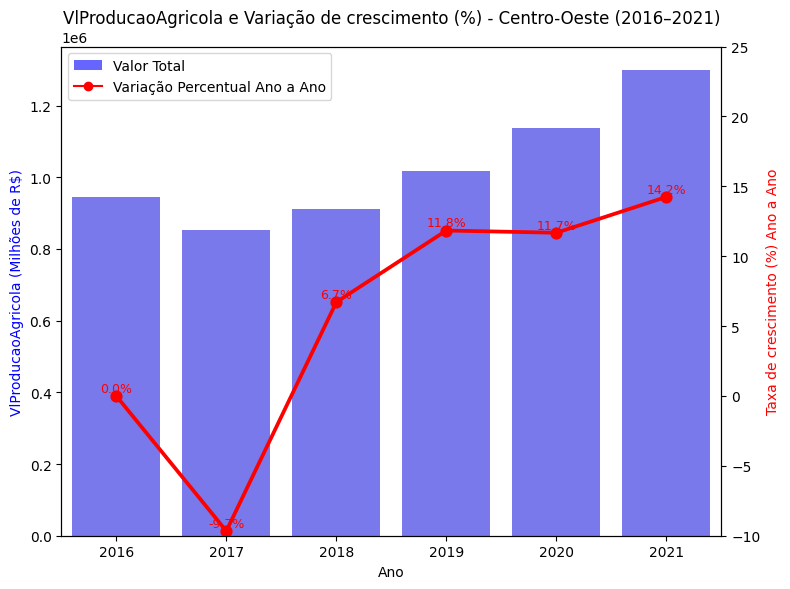

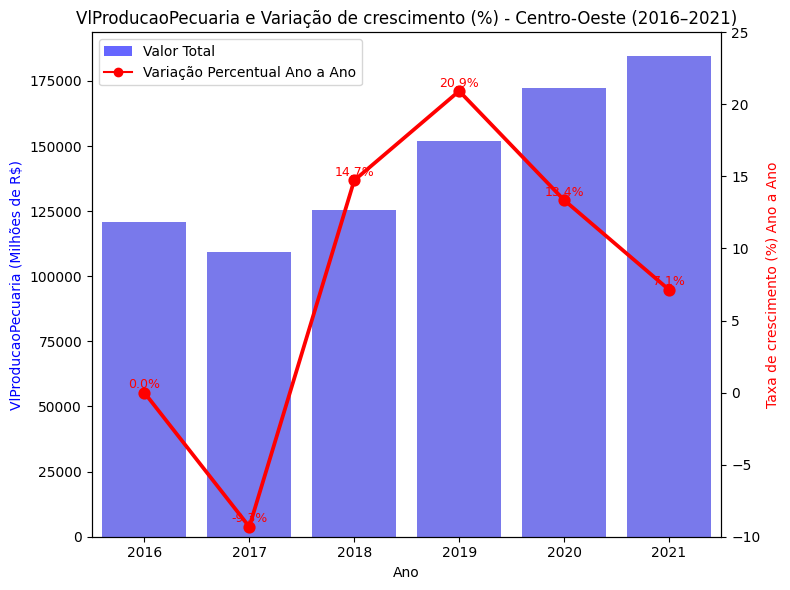

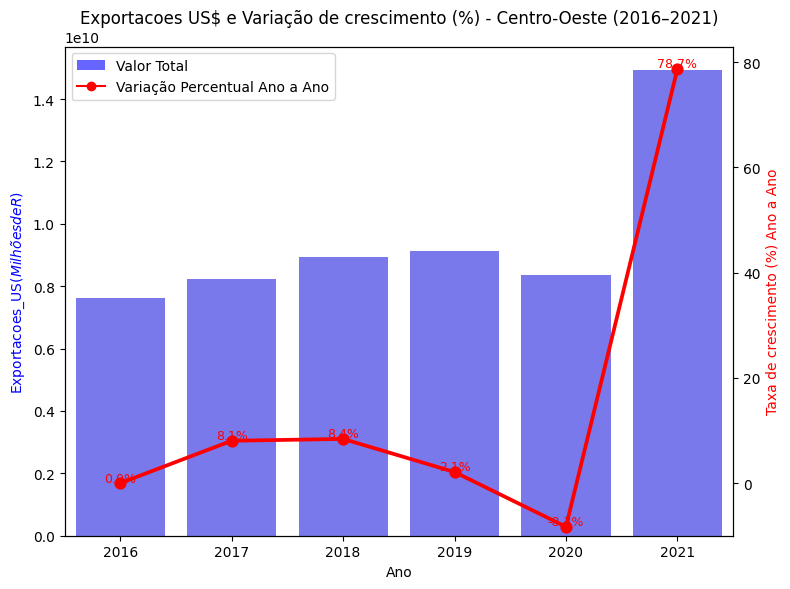

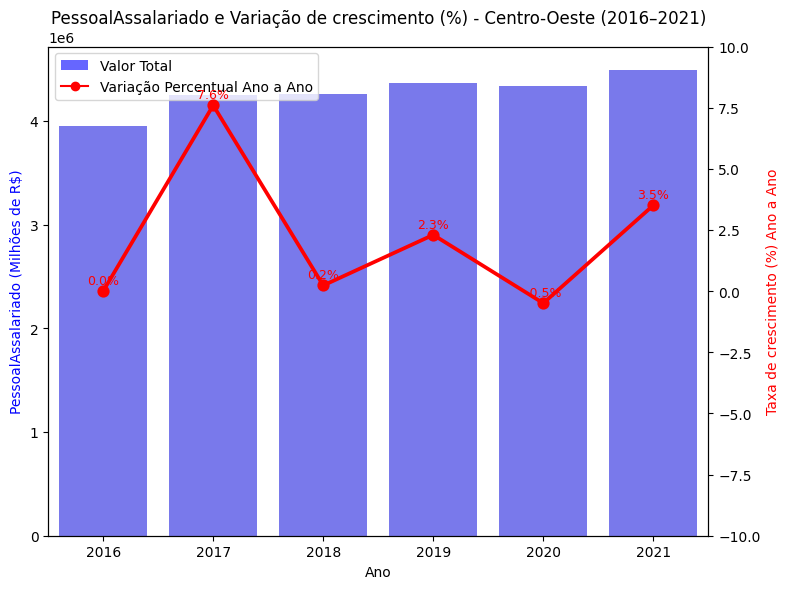

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

def gerar_grafico(dados, variavel, ylim_valores=None, ylim_percentual=(-10, 25)):
    dados_Centro_Oeste = dados[dados["Regiao"] == "Centro-Oeste"]
    dados_Centro_Oeste = dados_Centro_Oeste.groupby("Ano")[variavel].sum().reset_index()

    valores = list(dados_Centro_Oeste[variavel])
    diferencas = [0]
    for i in range(1, len(valores)):
        x = (((valores[i] - valores[i - 1]) / valores[i - 1]) * 100)
        diferencas.append(x)

    dados_Centro_Oeste["DiferencaAnoAnterior"] = diferencas

    fig, ax1 = plt.subplots(figsize=(8, 6))

    sns.barplot(data=dados_Centro_Oeste, x="Ano", y=variavel, color="blue", alpha=0.6, ax=ax1)
    ax1.set_ylabel(f"{variavel} (Milhões de R$)", color="blue")

    if ylim_valores:
        ax1.set_ylim(ylim_valores)

    ax2 = ax1.twinx()
    sns.pointplot(data=dados_Centro_Oeste, x="Ano", y="DiferencaAnoAnterior", color="red", ax=ax2)
    ax2.set_ylabel("Taxa de crescimento (%) Ano a Ano", color='red')
    ax2.set_ylim(ylim_percentual)

    for i, valor in enumerate(dados_Centro_Oeste["DiferencaAnoAnterior"]):
        ax2.text(i, valor + 0.3, f'{valor:.1f}%', color='red', ha='center', fontsize=9)

    plt.title(f"{variavel.replace('_', ' ')} e Variação de crescimento (%) - Centro-Oeste (2016–2021)")
    ax1.set_xlabel("Ano")

    legend_elements = [
        Patch(facecolor='blue', alpha=0.6, label='Valor Total'),
        Line2D([0], [0], marker='o', color='red', label='Variação Percentual Ano a Ano')
    ]
    ax1.legend(handles=legend_elements, loc='upper left')

    plt.tight_layout()
    plt.show()

gerar_grafico(dados, "VlProducaoAgricola", ylim_valores=None, ylim_percentual=(-10, 25))
gerar_grafico(dados, "VlProducaoPecuaria", ylim_valores=None, ylim_percentual=(-10, 25))
gerar_grafico(dados, "Exportacoes_US$", ylim_valores=None, ylim_percentual=(-10, 83))
gerar_grafico(dados, "PessoalAssalariado", ylim_valores=None, ylim_percentual=(-10, 10))


**Resultado Produção Agrícola (R$) e Variação de crescimento (%) - Centro-Oeste (2016–2021):**

Neste primeiro gráfico, observou-se um crescimento contínuo da produção agrícola na região, com um aumento significativo entre os anos de 2018 e 2019 (11,8%) e entre 2020 e 2021 (14,2%).

**Resultado gráfico Produção Pecuária (R$) e Variação de crescimento (%) - Centro-Oeste (2016–2021)**

No segundo gráfico, que apresenta os dados da produção pecuária, também revela um crescimento constante dessa atividade, com um pico de 20,9% em 2019, seguido de uma desaceleração nos anos subsequentes.

**Resultado gráfico Exportações (R$) e Variação de crescimento (%) - Centro-Oeste (2016–2021)**

No terceiro gráfico, referente às exportações, foi possível identificar uma leve queda entre 2018 e 2020. No entanto, entre 2020 e 2021, houve um grande aumento, com um salto de quase 80%.

**Resultado gráfico Quantidade de pessoas assalariadas e Diferença Ano a Ano - Centro-Oeste**

o quarto gráfico mostra que a quantidade de pessoas assalariadas não apresentou mudanças significativas durante o período analisado, com o maior aumento ocorrendo entre 2016 e 2017.

### **ANÁLISE GERAL:**

Em análise geral, os dados sugerem que, apesar do crescimento constante da produção agrícola e pecuária, bem como do considerável aumento nas exportações em 2021, esses fatores não tiveram um impacto relevante na empregabilidade da região. O número de pessoas assalariadas permaneceu praticamente estável ao longo do período, com poucas alterações significativas.





# 🦠 **Análise do impacto da COVID-19 no crescimento do pessoal assalariado**

Este tópico apresenta a análise do impacto da pandemia de Covid-19 no crescimento do pessoal assalariado em cidades brasileiras classificadas como turísticas e não turísticas.

Como é sabido, a pandemia da COVID-19 impactou drasticamente diversos setores econômicos, sendo o turismo um dos mais afetados em todo o mundo. No Brasil, onde muitas cidades têm o turismo como atividade econômica central, entender como a crise sanitária influenciou o mercado de trabalho é de grande importância. A análise da variação do pessoal assalariado nas cidades turísticas permite avaliar o real impacto da pandemia sobre o emprego formal  e direcionar ações estratégicas para fortalecer a economia local no cenário pós-pandêmico.

Nesta análise, foram utilizadas informações sobre o número de trabalhadores assalariados em municípios brasileiros, sendo que a classificação das cidades mais turísticas foi baseada no levantamento disponível no site do Ministério do Turismo(2).

Os dados foram agrupados por ano, e a partir deles foi calculada a taxa de crescimento ano a ano do pessoal assalariado, expressando a variação percentual em relação ao ano anterior.

Com essas informações, elaborou-se um gráfico de linha comparativo:

- A linha verde representa o crescimento nas cidades turísticas.

- A linha azul representa o crescimento nas cidades não turísticas.

Cada ponto no gráfico mostra a taxa de crescimento anual, permitindo a comparação da evolução entre os dois tipos de cidade ao longo do tempo, especialmente no período crítico da pandemia.

A linha preta horizontal no valor de 0% foi adicionada para facilitar a identificação de anos de crescimento e anos de retração.

O objetivo é analisar como a pandemia afetou de maneira distinta o mercado de trabalho nas cidades que dependem do turismo, em comparação às demais.

**Referências:**

 2- Levantamento aponta tendência de crescimento na busca por viagens no segundo semestre de 2024. Disponível em: <https://www.gov.br/turismo/pt-br/assuntos/noticias/levantamento-aponta-tendencia-de-crescimento-na-busca-por-viagens-no-segundo-semestre-de-2024>. Acesso em: 26 abr. 2025.


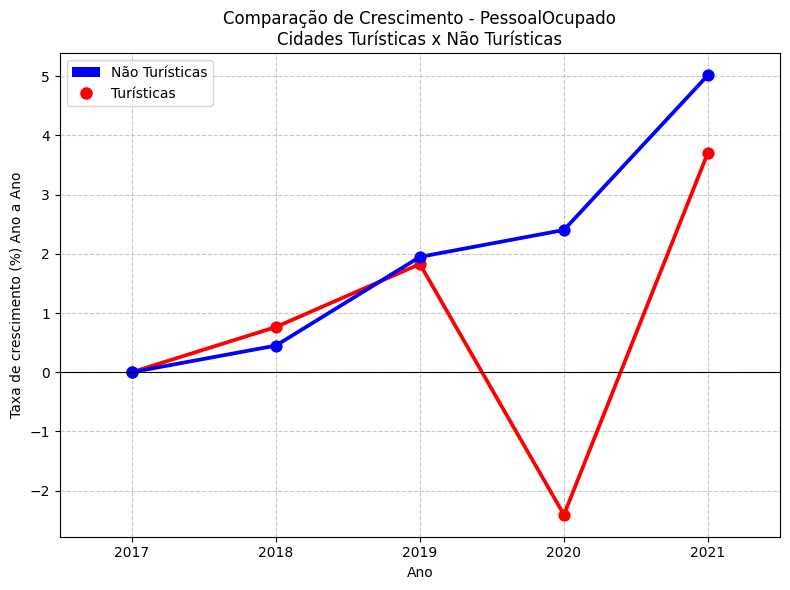

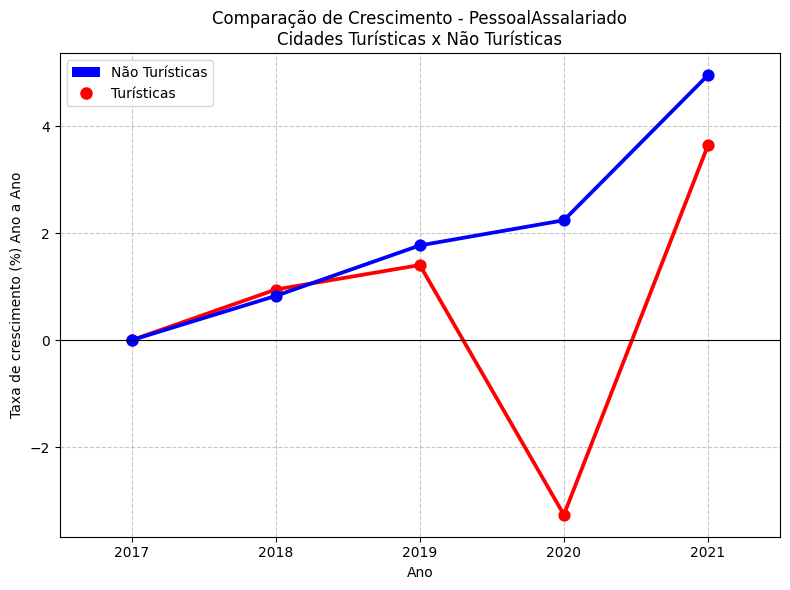

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

cidades_turisticas = [
    "Rio de Janeiro", "Maceió", "São Paulo", "Porto de Galinhas",
    "Porto Seguro", "Gramado", "Natal", "Fortaleza",
    "Campos do Jordão", "Salvador", "Maragogi", "Foz do Iguaçu",
    "João Pessoa", "Recife", "Caldas Novas", "Florianópolis", "Olímpia",
    "Balneário Camboriú", "Ilhéus", "Curitiba"
]

dados = dados[dados["Ano"].isin([2017, 2018, 2019, 2020, 2021])]

for tipo in ["PessoalOcupado", "PessoalAssalariado"]:
    dados_turisticos = dados[dados["Municipio"].isin(cidades_turisticas)]
    dados_normais = dados[~dados["Municipio"].isin(cidades_turisticas)]

    dados_turisticos = dados_turisticos.groupby("Ano")[tipo].sum().reset_index()
    dados_normais = dados_normais.groupby("Ano")[tipo].sum().reset_index()

    valores_turisticos = list(dados_turisticos[tipo])
    diferencas_turisticos = [0]
    for i in range(1, len(valores_turisticos)):
        x = (((valores_turisticos[i] - valores_turisticos[i - 1]) / valores_turisticos[i - 1]) * 100)
        diferencas_turisticos.append(x)
    dados_turisticos["DiferencaAnoAnterior"] = diferencas_turisticos

    valores_normais = list(dados_normais[tipo])
    diferencas_normais = [0]
    for i in range(1, len(valores_normais)):
        x = (((valores_normais[i] - valores_normais[i - 1]) / valores_normais[i - 1]) * 100)
        diferencas_normais.append(x)
    dados_normais["DiferencaAnoAnterior"] = diferencas_normais

    fig, ax1 = plt.subplots(figsize=(8, 6))
    sns.pointplot(data=dados_turisticos, x="Ano", y="DiferencaAnoAnterior", color="red", ax=ax1, label="Turísticas")
    sns.pointplot(data=dados_normais, x="Ano", y="DiferencaAnoAnterior", color="blue", ax=ax1, label="Não Turísticas")

    ax1.set_ylabel("Taxa de crescimento (%) Ano a Ano")
    ax1.set_title(f"Comparação de Crescimento - {tipo}\nCidades Turísticas x Não Turísticas")
    ax1.axhline(0, color="black", linewidth=0.8)
    ax1.grid(True, linestyle="--", alpha=0.7)

    legend_elements = [
        Patch(facecolor='blue', label='Não Turísticas'),
        Line2D([0], [0], marker='o', color='red', label='Turísticas', linestyle='', markersize=8)
    ]
    ax1.legend(handles=legend_elements)

    plt.tight_layout()
    plt.show()

### **Resultado Gráfico de pessoas ocupadas e assalariadas:**

Os gráficos de pessoal assalariado e pessoal ocupado apresentam comportamentos praticamente idênticos, com curvas muito semelhantes ao longo dos anos analisados.

De 2017 a 2019, tanto em cidades turísticas quanto não turísticas, observou-se um crescimento contínuo dessas duas categorias, com taxas variando entre 0,8% e 2% ao ano. Esse período reflete um mercado de trabalho em expansão, com contratações acontecendo de forma estável.

Em 2020, com o impacto direto da pandemia, ocorreu uma forte queda nas cidades turísticas, com crescimento negativo de aproximadamente -2%, tanto no número de pessoas ocupadas quanto de assalariadas. Isso evidencia o quanto o setor de turismo foi imediatamente afetado pelas restrições de mobilidade e fechamento de estabelecimentos.

Por outro lado, nas cidades não turísticas, os dados mostram resiliência: o crescimento se manteve positivo em 2020, ainda que mais discreto, indicando que essas regiões sofreram menos com os efeitos da crise no mercado de trabalho formal e geral.

Em 2021, houve uma recuperação clara nos dois grupos. O crescimento voltou a ser positivo tanto nas cidades turísticas quanto nas não turísticas, em termos de pessoal ocupado e assalariado, o que sinaliza uma reativação econômica e a retomada do mercado de trabalho com o afrouxamento das medidas restritivas.